In [291]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
import sys
import os
import os

bs_data= pd.read_csv('bluesky_allkeywords.csv')
days = list(bs_data.columns)[1:]


#Function to test if a date is a trading day
def is_trading_day(date):
    return date in stock_data.columns


def next_trading_day(day):
    date = dt.datetime.strptime(day, '%Y-%m-%d')
    next_day = date + dt.timedelta(1)
    max_lookahead = 365  # prevent infinite loop going 1 year ahead
    count = 0
    while not is_trading_day(next_day):
        next_day += dt.timedelta(1)
        count += 1
        if count > max_lookahead:
            raise ValueError("No trading day found within 1 year from start date")
    return next_day.strftime('%Y-%m-%d')

for day in days:
   if is_trading_day(day) == False:
       bs_data[next_trading_day(day)] = bs_data[day] + bs_data[next_trading_day(day)]
       bs_data = bs_data.drop(columns=[day])

sd =stock_data.T
match_stock_data = sd['2024-07-31': '2025-07-30']
match_sd_pct_change = match_stock_data.pct_change()
match_sd_pct_change = match_sd_pct_change.drop('2024-07-31')
bs_data= bs_data.drop(bs_data.columns[0], axis=1)
bs_data.index = sp500_tickers



In [ ]:
# X = # social media posts about a company, Y = daily stock return
import matplotlib.pyplot as plt
company = 'TSLA'
x = match_sd_pct_change
y=bs_data.T


day_forward =  stock_data.T['2024-08-01': '2025-07-31']
pct_day_forward = day_forward.pct_change()
pct_day_forward = pct_day_forward.drop('2024-08-01')
x2= pct_day_forward

wv = weekly_variance
week_after = wv['2024-08-08': '2025-08-06']
week_after.head()
x3 = week_after

month_after = monthly_variance['2024-09-01': '2025-09-01']
x4 = month_after




Ticker          AMZN      AAPL       CVS      TSLA     GOOGL      META  \
Date                                                                     
2024-09-03  0.001084  0.000261  0.001092  0.001242  0.001175  0.000538   
2024-09-04  0.001243  0.000264  0.000945  0.001114  0.001516  0.000361   
2024-09-05  0.001266  0.000303  0.000581  0.001278  0.002265  0.000366   
2024-09-06  0.001365  0.000303  0.000496  0.000982  0.002220  0.000328   
2024-09-09  0.001338  0.000323  0.000357  0.000816  0.002516  0.000429   

Ticker           JPM      COST        KR       UPS  ...      CSCO         T  \
Date                                                ...                       
2024-09-03  0.000891  0.000220  0.001618  0.003701  ...  0.005304  0.002044   
2024-09-04  0.000976  0.000217  0.001216  0.003477  ...  0.004676  0.001976   
2024-09-05  0.000994  0.000217  0.000885  0.003314  ...  0.004104  0.001929   
2024-09-06  0.001039  0.000221  0.000488  0.003138  ...  0.003468  0.002008   
2024-09

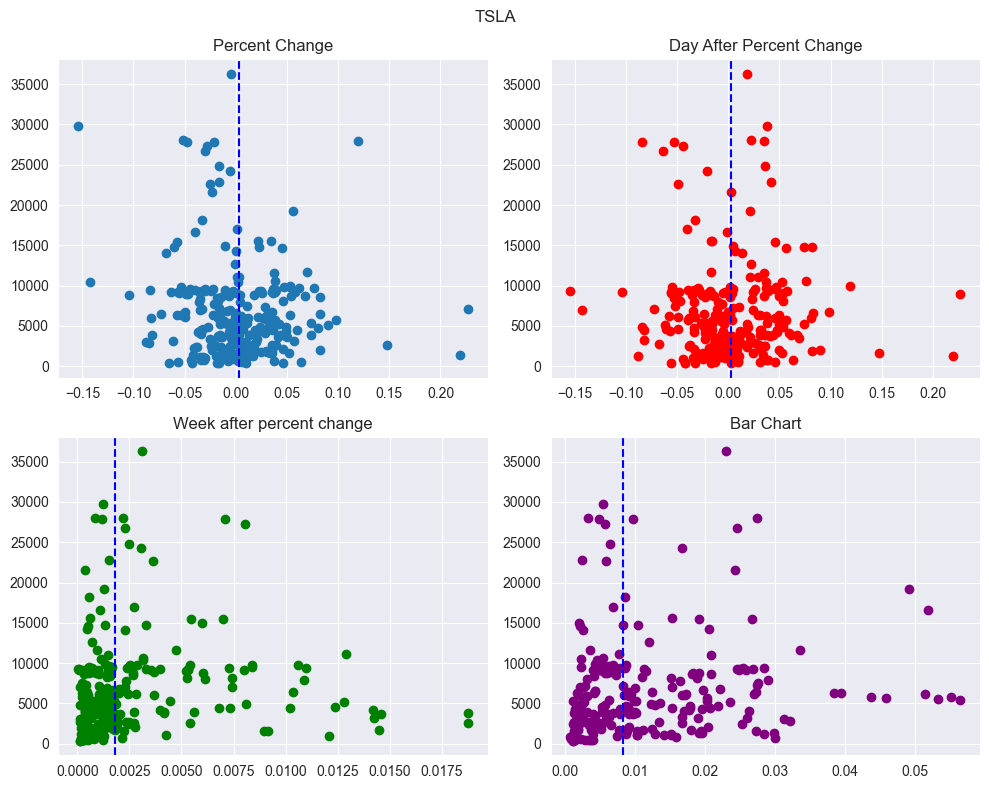

In [370]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) 
fig.suptitle(company)
# Plot 1
axs[0, 0].scatter(x[company], y[company])
axs[0, 0].axvline(x=av_pct_change[company], color='b', linestyle='--', label = "super average")
axs[0, 0].set_title('Percent Change')

# Plot 2
axs[0, 1].scatter(x2[company], y[company], color = 'red')
axs[0, 1].axvline(x=av_pct_change[company], color='b', linestyle='--', label = "super average")
axs[0, 1].set_title('Day After Percent Change')

# Plot 3
axs[1, 0].scatter(x3[company], y[company], color = 'green')
axs[1, 0].axvline(x=av_weekly_variance[company], color='b', linestyle='--', label = "super average")
axs[1, 0].set_title('Week after percent change')


# Plot 4
axs[1, 1].scatter(x4[company], y[company], color = 'purple')
axs[1, 1].axvline(x=av_monthly_variance[company], color='b', linestyle='--', label = "super average")
axs[1, 1].set_title('Bar Chart')

plt.tight_layout()
plt.show()


In [285]:
#Stock data 
sns.set_style('darkgrid')
import yfinance as yf

sp500_tickers = ["WMT", "AMZN", "AAPL", "CVS", "TSLA", "GOOGL", "META", "JPM", "COST", "KR",
"WBA", "TGT", "UPS", "CNC", "CI", "MSFT", "VZ", "IBM", "UNH", "XOM",
"MCK", "CVX", "CAH", "HD", "WBA", "MPC", "COR", "F", "C", "DELL",
"GM", "NVDA", "PFE", "PG", "CMCSA", "JNJ", "WFC", "BAC", "ABBV", "SBUX",
"CSCO", "T", "PEP", "INTC", "DIS", "BA", "GS", "MS", "HON", "CRM"
]

# Get the data for tickers from yahoo finance

# Download Close price data for tickers
stock_data_unordered = yf.download(sp500_tickers, '2023-01-01', '2025-10-01', auto_adjust=True)['Close']

# Download S&P 500 index data
SP500 = yf.download('^GSPC', '2023-01-01', '2025-10-01', auto_adjust=True)['Close']

# Transpose stock data so tickers are row index
stock_data_unordered = stock_data_unordered.T

# Reorder rows by original ticker list order
stock_data = stock_data_unordered.loc[sp500_tickers]
stock_data = stock_data.T


[*********************100%***********************]  49 of 49 completed
[*********************100%***********************]  1 of 1 completed


In [367]:
#_________________________________________________________________________
#Version with NaN values for weekends/holidays.
# Create a date range including weekends
all_days = pd.date_range(start='2023-01-03', end='2025-09-30', freq='D')
# Reindex the DataFrame with this date range
sd3= stock_data.T
reindexed_stock_data = sd3.reindex(all_days)
reindexed_SP500 = SP500.reindex(all_days)

In [369]:
#log returns
lr = np.log(stock_data/stock_data.shift(1)).dropna()
log_returns = lr.T
SP_log_returns = np.log(SP500/SP500.shift(1)).dropna()
#Percentage change in stock returns day-to-day (in lieu of trading day variance)
SP_pct_change = SP500.pct_change().dropna()
sd2= stock_data.T
pct_change = sd2.pct_change().dropna()
#variance of stock returns over each week in the period (5 trading days) 
SP_weekly_variance = SP_log_returns.rolling(window=5).var().dropna()
weekly_variance = log_returns.rolling(window=5).var().dropna()


#variance of stock returns over each month in the period (21 trading days)
SP_monthly_variance = SP_log_returns.rolling(window=21).var().dropna()
monthly_variance = log_returns.rolling(window=21).var().dropna()
#variance of stock returns over each 2 weeks in the period (10 trading days)
SP_biweekly_variance = SP_log_returns.rolling(window=10).var().dropna()
biweekly_variance = log_returns.rolling(window=10).var().dropna()





#super averages
#average percent change in a single day
Av_SP_pct_change = SP_pct_change.mean()
av_pct_change = pct_change.mean()
#average weekly variance
av_weekly_variance = weekly_variance.mean()
Av_SP_weekly_variance = SP_weekly_variance.mean()
#average monthly variance
av_monthly_variance = monthly_variance.mean()
Av_SP_monthly_variance = SP_monthly_variance.mean()
#average biweekly variance
av_biweekly_variance = biweekly_variance.mean()
Av_SP_biweekly_variance = SP_biweekly_variance.mean()

print(av_monthly_variance)
#Note: variance windows are in trading days, not calendar days. Moreover, these are backwards looking rolling variances.


Ticker
AMZN     0.001220
AAPL     0.001208
CVS      0.002979
TSLA     0.008284
GOOGL    0.004765
META     0.001924
JPM      0.001934
COST     0.000806
KR       0.001077
UPS      0.001535
CNC      0.003657
CI       0.002788
MSFT     0.001973
VZ       0.001127
IBM      0.001055
UNH      0.003125
XOM      0.002692
MCK      0.001250
CVX      0.001277
CAH      0.001340
HD       0.001080
COR      0.001722
F        0.002085
C        0.001721
DELL     0.002820
GM       0.003589
NVDA     0.003691
PFE      0.004303
PG       0.000942
CMCSA    0.000783
JNJ      0.000772
WFC      0.001584
BAC      0.000353
ABBV     0.001832
SBUX     0.001786
CSCO     0.001379
T        0.000965
PEP      0.000861
INTC     0.004504
DIS      0.003999
BA       0.002058
GS       0.001580
MS       0.000256
HON      0.000964
CRM      0.001366
dtype: float64


C:\Users\Thisu\AppData\Local\Temp\ipykernel_5772\519933550.py:8: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pct_change = sd2.pct_change().dropna()
